In [1]:
import sys
import os
local_modules = os.path.abspath('../modules')
if local_modules not in sys.path:
    sys.path.append(local_modules)

import numpy as np    
import matplotlib.pyplot as plt
from IPython.display import HTML
from lloyd_relaxation import LloydRelaxation
from animation import RelaxationAnimation

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
data = np.random.uniform(0, 1, size=(2, 10))
seed = np.random.uniform(0.49, 0.51, size=(2, 100))
data = np.hstack((data, seed))
relaxation = LloydRelaxation(data)

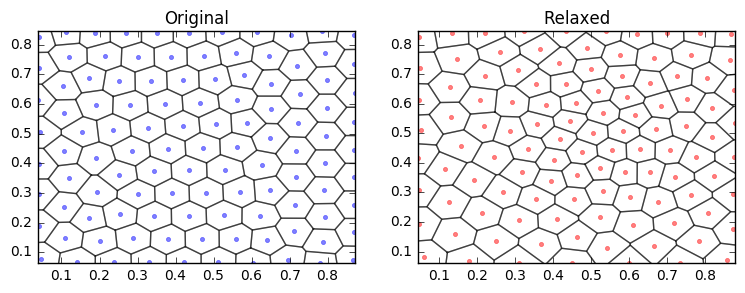

In [6]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3))
relaxation.plot_voronoi_regions(ax=ax0, point_color='blue')
relaxation.run(n_iters=75, record=True)
relaxation.plot_voronoi_regions(ax=ax1, point_color='red')
_ = ax0.set_title('Original'), ax1.set_title('Relaxed')

In [7]:
%%capture
video = relaxation.get_video(shader='log_area', cmap=plt.cm.jet_r, include_ridges=False, framerate=10)
HTML(video)